In [3]:
#1. Import the Libraries
import pandas as pd
import numpy as np
from collections import Counter as c
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



In [4]:
#2. Read the Dataset
df = pd.read_csv('chronickidneydisease.csv')


In [5]:
#3. Analyze the Dataset
# View the first few rows of the dataset
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# View the last few rows of the dataset
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [7]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [8]:
#To know about the columns present in the dataset
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
#4. Drop Unnecessary Columns
#  Assuming we don't need 'id' for analysis
df = df.drop(columns=['id'],axis=1)


In [10]:
#5. Change the Column Names
#  Example of renaming columns
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [11]:
# Check the data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cell           248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [12]:
# Get the basic statistics
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [14]:
#Rectifying the unknown class "ckd\t"
df['class']=df['class'].replace("ckd\t","ckd")
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [15]:
catcols=set(df.dtypes[df.dtypes=='O'].index.values)
print(catcols)

{'red_blood_cell', 'pedal_edema', 'appetite', 'hypertension', 'diabetesmellitus', 'anemia', 'white_blood_cell_count', 'red_blood_cell_count', 'class', 'packed_cell_volume', 'coronary_artery_disease', 'bacteria', 'pus_cell', 'pus_cell_clumps'}


In [16]:
for i in catcols:
    print("Columns:", i)
    print(c(df[i]))
    print('*'*120+'\n')

Columns: red_blood_cell
Counter({'normal': 201, nan: 152, 'abnormal': 47})
************************************************************************************************************************

Columns: pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
************************************************************************************************************************

Columns: appetite
Counter({'good': 317, 'poor': 82, nan: 1})
************************************************************************************************************************

Columns: hypertension
Counter({'no': 251, 'yes': 147, nan: 2})
************************************************************************************************************************

Columns: diabetesmellitus
Counter({'no': 258, 'yes': 134, '\tno': 3, '\tyes': 2, nan: 2, ' yes': 1})
************************************************************************************************************************

Columns: anemia
Counter({'no'

In [17]:
# Removing the columns which are not categorical
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)


{'red_blood_cell', 'pedal_edema', 'appetite', 'hypertension', 'diabetesmellitus', 'anemia', 'class', 'coronary_artery_disease', 'bacteria', 'pus_cell', 'pus_cell_clumps'}


In [18]:
# Numerical columns
contcols=set(df.dtypes[df.dtypes!='O'].index.values)
print(contcols)

{'serum_creatinine', 'albumin', 'sugar', 'specific_gravity', 'blood_pressure', 'blood_urea', 'sodium', 'blood_glucose_random', 'potassium', 'hemoglobin', 'age'}


In [19]:
for i in contcols:
    print("Continuos columns:",i)
    print(c(df[i]))
    print('*'*120+'\n')

Continuos columns: serum_creatinine
Counter({1.2: 40, 1.1: 24, 1.0: 23, 0.5: 23, 0.7: 22, 0.9: 22, 0.6: 18, 0.8: 17, 2.2: 10, 1.5: 9, 1.7: 9, 1.3: 8, 1.6: 8, 1.8: 7, 1.4: 7, 2.5: 7, 2.8: 7, 1.9: 6, 2.7: 5, 2.1: 5, 2.0: 5, 3.2: 5, 3.3: 5, 3.9: 4, 7.3: 4, 4.0: 3, 2.4: 3, 3.4: 3, 2.9: 3, 5.3: 3, 2.3: 3, 7.2: 2, 4.6: 2, 4.1: 2, 5.2: 2, 6.3: 2, 3.0: 2, 6.1: 2, 6.7: 2, 5.6: 2, 6.5: 2, 4.4: 2, 6.0: 2, 3.8: 1, 24.0: 1, 9.6: 1, 76.0: 1, 7.7: 1, nan: 1, 10.8: 1, 5.9: 1, 3.25: 1, nan: 1, 9.7: 1, 6.4: 1, 32.0: 1, nan: 1, nan: 1, 8.5: 1, 15.0: 1, 3.6: 1, 10.2: 1, 11.5: 1, nan: 1, 12.2: 1, 9.2: 1, 13.8: 1, 16.9: 1, 7.1: 1, 18.0: 1, 13.0: 1, 48.1: 1, 14.2: 1, 16.4: 1, nan: 1, nan: 1, 2.6: 1, 7.5: 1, 4.3: 1, 18.1: 1, 11.8: 1, 9.3: 1, 6.8: 1, 13.5: 1, nan: 1, 12.8: 1, 11.9: 1, nan: 1, nan: 1, nan: 1, 12.0: 1, nan: 1, 13.4: 1, 15.2: 1, 13.3: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 0.4: 1})
****************************************************************************************************************

In [20]:
# Removing the columns which are non Numerical
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)


{'serum_creatinine', 'blood_pressure', 'blood_urea', 'sodium', 'blood_glucose_random', 'potassium', 'hemoglobin', 'age'}


In [21]:
# Adding columns which we found Continuous
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'serum_creatinine', 'blood_pressure', 'blood_urea', 'sodium', 'blood_glucose_random', 'potassium', 'hemoglobin', 'age', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'}


In [22]:
# Addind columns which we found Categorical
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'albumin', 'red_blood_cell', 'pedal_edema', 'appetite', 'hypertension', 'diabetesmellitus', 'anemia', 'specific_gravity', 'sugar', 'class', 'coronary_artery_disease', 'bacteria', 'pus_cell', 'pus_cell_clumps'}


In [23]:
# Rectifying the Categoirical columns Classes
df['coronary_artery_disease'] = df.coronary_artery_disease.replace('\tno','no')
c(df['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [24]:
df['diabetesmellitus'] = df.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(df['diabetesmellitus'])

Counter({'no': 261, 'yes': 137, nan: 2})

In [25]:
#  Check for null values
print(df.isnull().any())


age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cell              True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool


In [26]:
# Returns the count of null values
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cell             152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [27]:
# Coverting string format to numeric by to_numeric() function
df.packed_cell_volume = pd.to_numeric(df.packed_cell_volume, errors='coerce')
df.white_blood_cell_count = pd.to_numeric(df.white_blood_cell_count, errors='coerce')
df.red_blood_cell_count = pd.to_numeric(df.red_blood_cell_count, errors='coerce')

In [28]:
# Handling the Null Values
# with mean()
df['blood_glucose_random'].fillna(df['blood_glucose_random'].mean(),inplace=True)
df['blood_pressure'].fillna(df['blood_pressure'].mean(),inplace=True)
df['blood_urea'].fillna(df['blood_urea'].mean(),inplace=True)
df['hemoglobin'].fillna(df['hemoglobin'].mean(),inplace=True)
df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean(),inplace=True)
df['potassium'].fillna(df['potassium'].mean(),inplace=True)
df['red_blood_cell_count'].fillna(df['red_blood_cell_count'].mean(),inplace=True)
df['serum_creatinine'].fillna(df['serum_creatinine'].mean(),inplace=True)
df['sodium'].fillna(df['sodium'].mean(),inplace=True)
df['white_blood_cell_count'].fillna(df['white_blood_cell_count'].mean(),inplace=True)
# with mode()
df['age'].fillna(df['age'].mode()[0],inplace=True)
df['hypertension'].fillna(df['hypertension'].mode()[0],inplace=True)
df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0],inplace=True)
df['appetite'].fillna(df['appetite'].mode()[0],inplace=True)
df['albumin'].fillna(df['albumin'].mode()[0],inplace=True)
df['pus_cell'].fillna(df['pus_cell'].mode()[0],inplace=True)
df['red_blood_cell'].fillna(df['red_blood_cell'].mode()[0],inplace=True)
df['coronary_artery_disease'].fillna(df['coronary_artery_disease'].mode()[0],inplace=True)
df['bacteria'].fillna(df['bacteria'].mode()[0],inplace=True)
df['anemia'].fillna(df['anemia'].mode()[0],inplace=True)
df['sugar'].fillna(df['sugar'].mode()[0],inplace=True)
df['diabetesmellitus'].fillna(df['diabetesmellitus'].mode()[0],inplace=True)
df['pedal_edema'].fillna(df['pedal_edema'].mode()[0],inplace=True)
df['specific_gravity'].fillna(df['specific_gravity'].mode()[0],inplace=True)



C:\Users\ratis\AppData\Local\Temp\ipykernel_32056\3762419704.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['blood_glucose_random'].fillna(df['blood_glucose_random'].mean(),inplace=True)
C:\Users\ratis\AppData\Local\Temp\ipykernel_32056\3762419704.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [29]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

# DATA VISUALIZATION

C:\Users\ratis\AppData\Local\Temp\ipykernel_32056\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

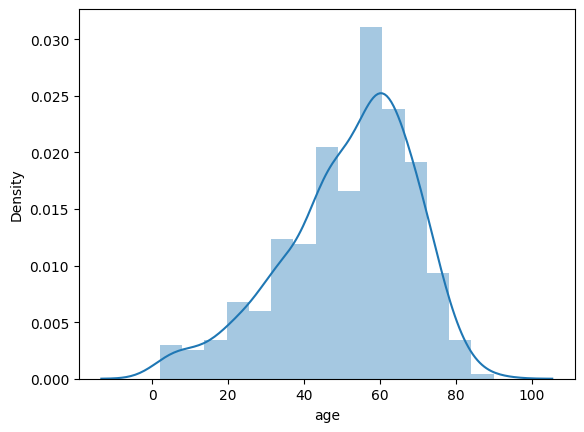

In [30]:
sns.distplot(df['age'])

In [31]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [32]:
df['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

<BarContainer object of 2 artists>

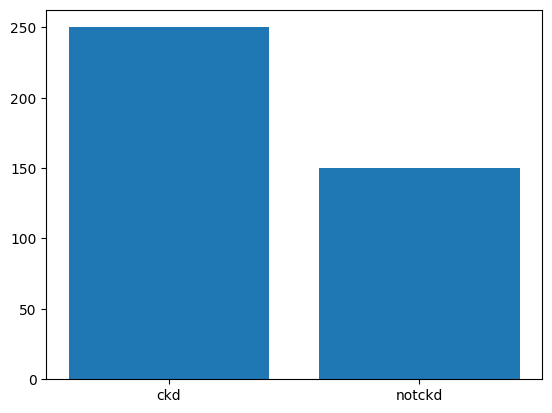

In [33]:
x=df['class'].unique()
y=df['class'].value_counts()
plt.bar(x,y)

<Axes: xlabel='age', ylabel='blood_pressure'>

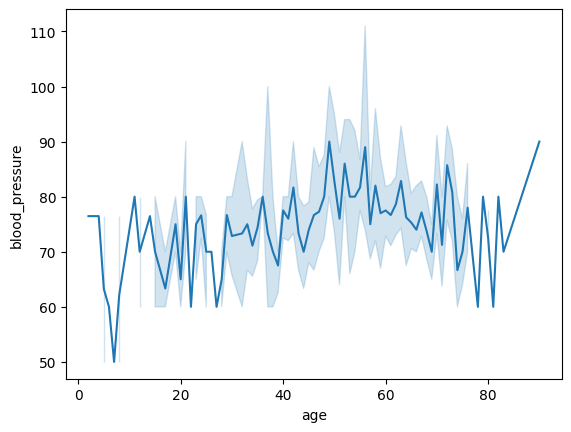

In [34]:
sns.lineplot(x='age',y='blood_pressure', data=df)

<Axes: xlabel='age', ylabel='hemoglobin'>

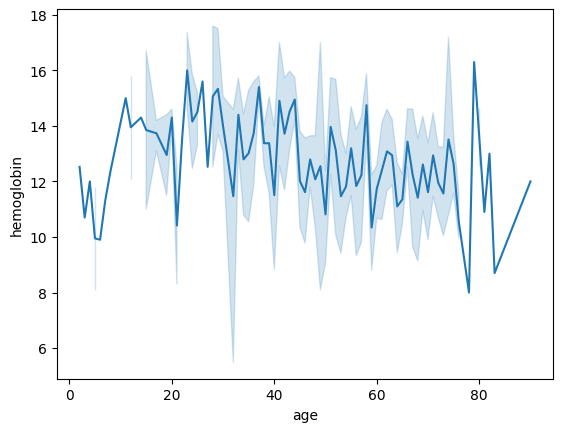

In [35]:
sns.lineplot(x='age',y='hemoglobin', data=df)

<Axes: xlabel='age', ylabel='blood_pressure'>

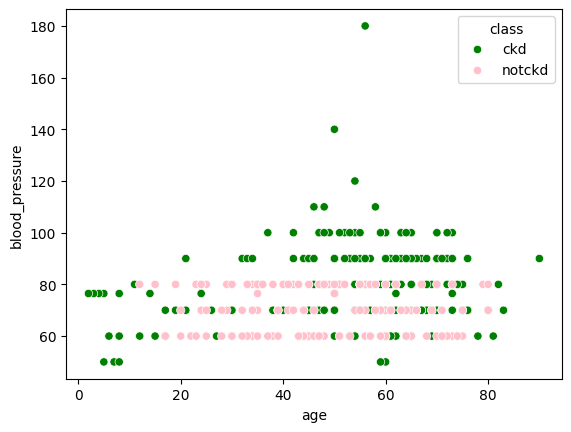

In [36]:
sns.scatterplot(x = 'age', y = 'blood_pressure', data = df, hue = 'class',palette = ['green','pink'])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'blood_pressure'}>,
        <Axes: title={'center': 'specific_gravity'}>,
        <Axes: title={'center': 'albumin'}>],
       [<Axes: title={'center': 'sugar'}>,
        <Axes: title={'center': 'blood_glucose_random'}>,
        <Axes: title={'center': 'blood_urea'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'sodium'}>,
        <Axes: title={'center': 'potassium'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'packed_cell_volume'}>],
       [<Axes: title={'center': 'white_blood_cell_count'}>,
        <Axes: title={'center': 'red_blood_cell_count'}>, <Axes: >,
        <Axes: >]], dtype=object)

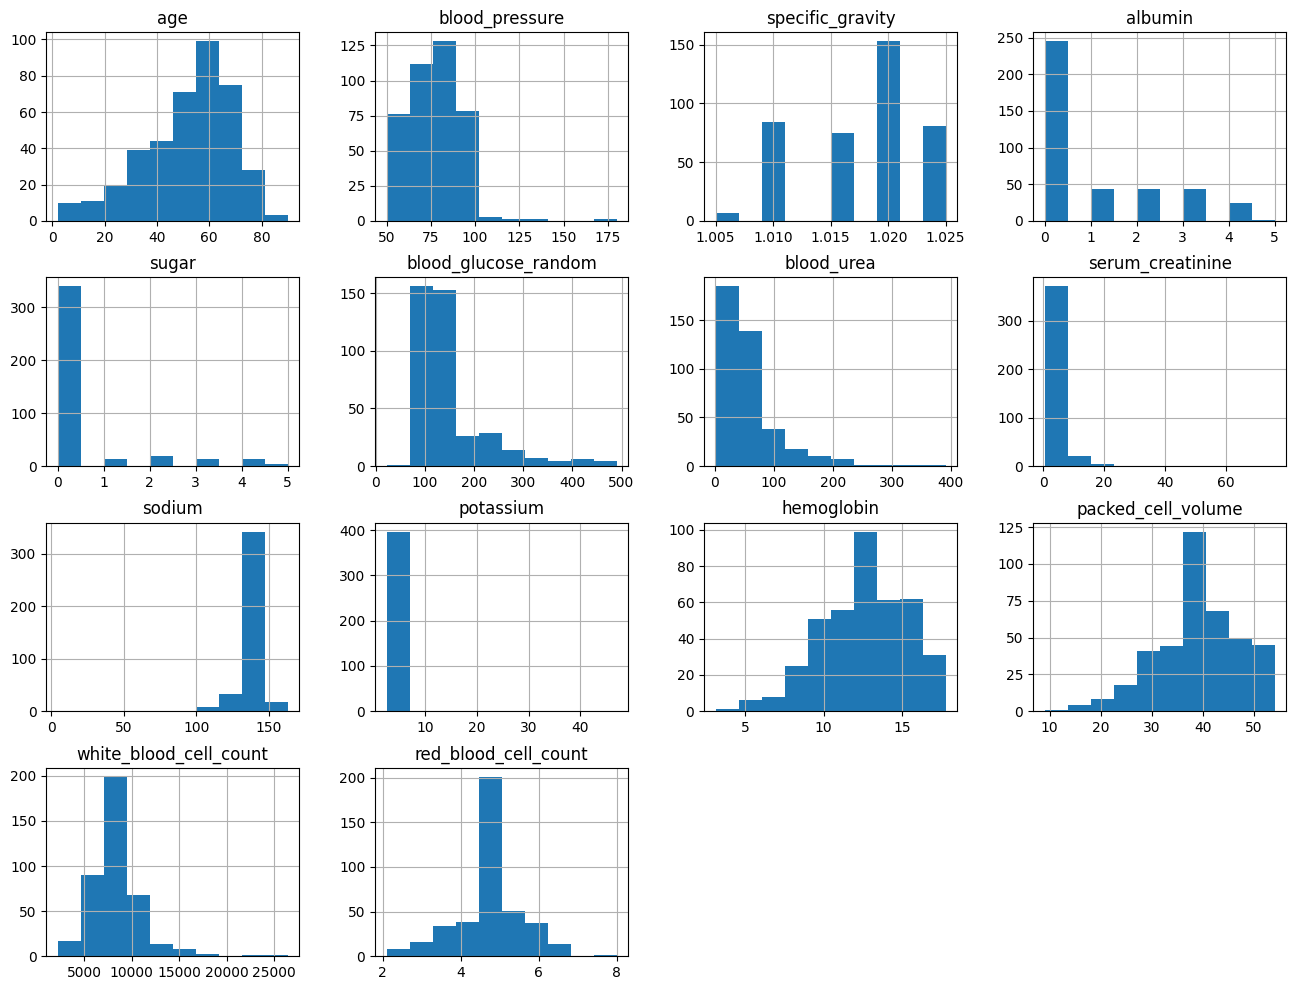

In [37]:
df.hist(figsize=(16,12))

In [38]:
# Label Encoding
for i in catcols:
    print("Label Encoding of:",i)
    le= LabelEncoder()
    print(c(df[i]))
    df[i]=le.fit_transform(df[i])
    print(c(df[i]))
    print("*"*100)

Label Encoding of: albumin
Counter({0.0: 245, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, 5.0: 1})
Counter({0: 245, 1: 44, 2: 43, 3: 43, 4: 24, 5: 1})
****************************************************************************************************
Label Encoding of: red_blood_cell
Counter({'normal': 353, 'abnormal': 47})
Counter({1: 353, 0: 47})
****************************************************************************************************
Label Encoding of: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
Label Encoding of: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
Label Encoding of: hypertension
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
**************************************************************************************

C:\Users\ratis\AppData\Local\Temp\ipykernel_32056\729556929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'])


<Axes: xlabel='class', ylabel='Density'>

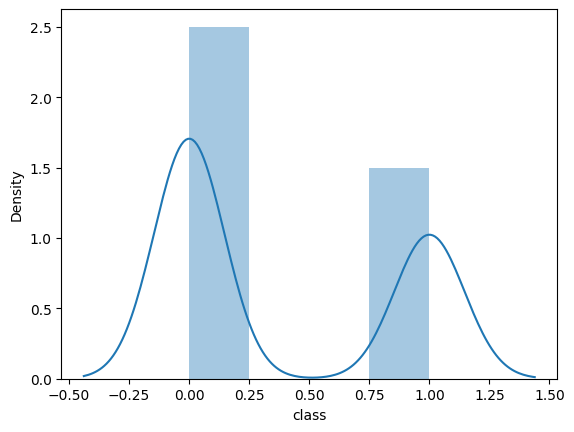

In [39]:
sns.distplot(df['class'])

In [40]:
# Creating Independent and dependent variables
selcols=['red_blood_cell','pus_cell','blood_glucose_random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(df,columns=selcols)
y=pd.DataFrame(df,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [41]:
x.head()

,red_blood_cell,pus_cell,blood_glucose_random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
0,1,1,121.000000,36.0,0,0,1,0
1,1,1,148.036517,18.0,0,0,0,0
2,1,1,423.000000,53.0,0,1,1,0
3,1,0,117.000000,56.0,1,1,0,0
4,1,1,106.000000,26.0,0,0,0,0


In [42]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [43]:
names=x.columns
names

Index(['red_blood_cell', 'pus_cell', 'blood_glucose_random', 'blood_urea',
       'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary_artery_disease'],
      dtype='object')

In [44]:
# Scaling - MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [45]:
X_scaled=scale.fit_transform(x)
X_scaled

array([[1.        , 1.        , 0.21153846, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.2693088 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.85683761, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.1965812 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.23290598, ..., 0.        , 0.        ,
        0.        ]])

In [46]:
X=pd.DataFrame(X_scaled, columns=names)

In [47]:
X.head()

,red_blood_cell,pus_cell,blood_glucose_random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
0,1.0,1.0,0.211538,0.088575,0.0,0.0,1.0,0.0
1,1.0,1.0,0.269309,0.042362,0.0,0.0,0.0,0.0
2,1.0,1.0,0.856838,0.132221,0.0,1.0,1.0,0.0
3,1.0,0.0,0.202991,0.139923,1.0,1.0,0.0,0.0
4,1.0,1.0,0.179487,0.062901,0.0,0.0,0.0,0.0


In [48]:
# Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(320, 8)
(320, 1)
(80, 8)
(80, 1)


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: Logistic Regression
Accuracy: 0.8875
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        54
           1       0.74      1.00      0.85        26

    accuracy                           0.89        80
   macro avg       0.87      0.92      0.88        80
weighted avg       0.92      0.89      0.89        80

Confusion Matrix:


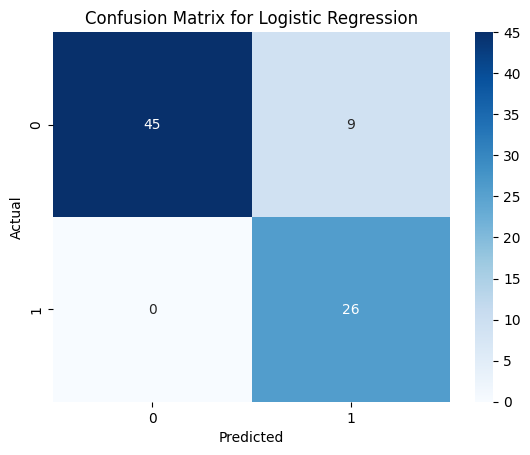

Model: Decision Tree
Accuracy: 0.9125
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.88      0.85      0.86        26

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

Confusion Matrix:


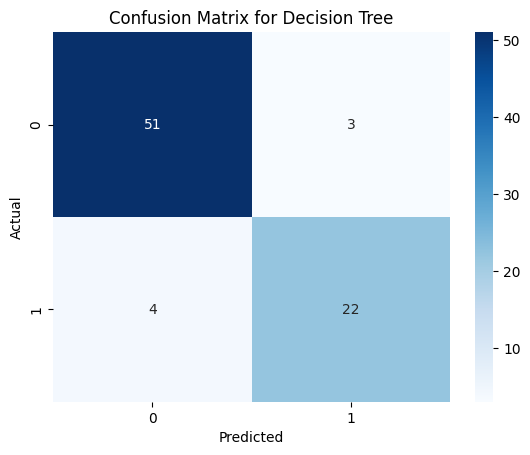

Model: Random Forest
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.92      0.92      0.92        26

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80

Confusion Matrix:


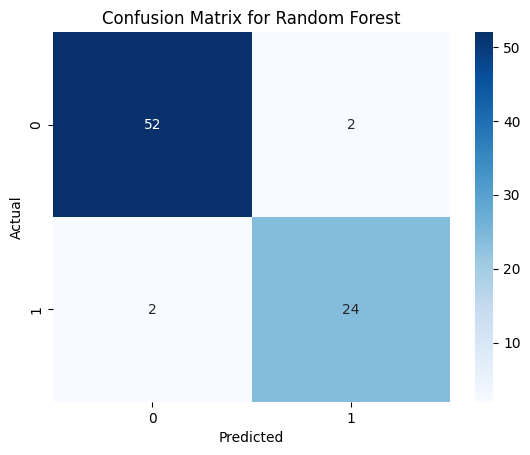

Model: SVM
Accuracy: 0.8875
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        54
           1       0.74      1.00      0.85        26

    accuracy                           0.89        80
   macro avg       0.87      0.92      0.88        80
weighted avg       0.92      0.89      0.89        80

Confusion Matrix:


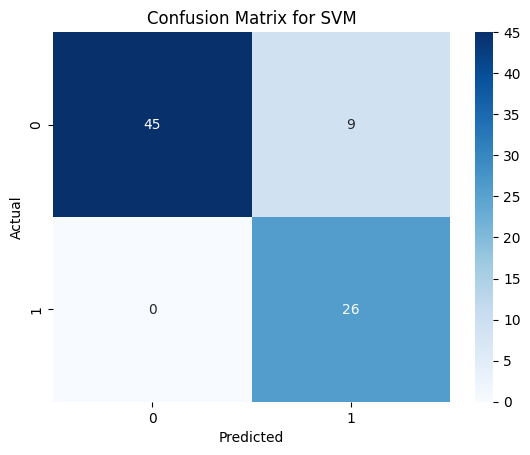

In [49]:
# Initialize the models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier()
svm = SVC()

# Train the models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rforest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_rforest = rforest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
predictions = [y_pred_logreg, y_pred_dtree, y_pred_rforest, y_pred_svm]

for model, y_pred in zip(models, predictions):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [50]:
# Compare the models
results = {
    'Model': models,
    'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                 accuracy_score(y_test, y_pred_dtree),
                 accuracy_score(y_test, y_pred_rforest),
                 accuracy_score(y_test, y_pred_svm)]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression    0.8875
1        Decision Tree    0.9125
2        Random Forest    0.9500
3                  SVM    0.8875
